In [1]:
import torch
from diffusers import StableDiffusion3Pipeline

pipe = StableDiffusion3Pipeline.from_pretrained(
    "trained_sd3",
    torch_dtype=torch.float16
).to("cuda:1")

# Warm Up
prompt = "a photo of a cat holding a sign that says hello world"
for _ in range(1):
    _ = pipe(prompt=prompt, generator=torch.manual_seed(1))

/home/FRACTAL/kalash.shah/miniconda3/envs/stable_diffusion/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|██████████| 28/28 [00:06<00:00,  4.16it/s]


In [2]:
# Run Inference

def gen_image(pipe, prompt, neg_prompt, guidance_scale = 7.0, num_inference_steps = 28):
    image = pipe(prompt=prompt,
                 negative_prompt = neg_prompt,
                 guidance_scale = guidance_scale,
                 num_inference_steps = num_inference_steps,
                 generator=torch.manual_seed(1)).images[0]
    
    return image

In [43]:
%%time
prompt = "A picture of a middle east woman and a man standing beside a Toyota Corolla cross 2022 car parked outside a home. The people have a smile on their faces"
#neg_prompt = "cartoon, anime, ugly"
neg_prompt = "poorly drawn faces, poorly drawn hands, legs, mutated body parts, disfigured, deformed body features, dirty, ugly, disfigured, cartoon, anime"
img = gen_image(pipe, prompt, neg_prompt, 9)

100%|██████████| 28/28 [00:06<00:00,  4.23it/s]


CPU times: user 7.13 s, sys: 338 ms, total: 7.46 s
Wall time: 7.06 s


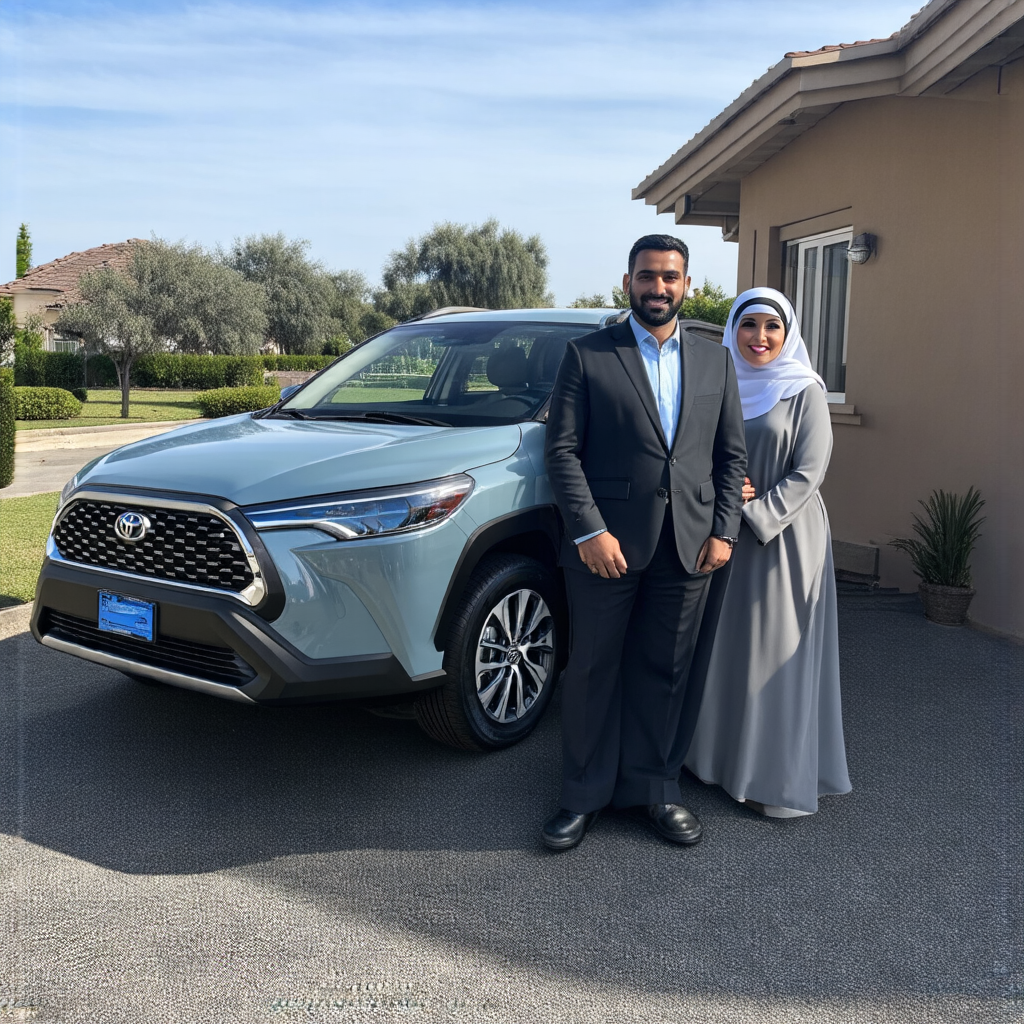

In [44]:
img